# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [115]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np



## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [116]:
df=pd.read_csv('RTA_Dataset.csv')
df2=pd.read_csv('RTA_Dataset.csv')


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [117]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [119]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [120]:
df.duplicated().sum()

0

In [121]:
df.drop_duplicates()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [122]:

most_frequent_Type_of_collision = df['Casualty_class'].mode()[0]

df['Casualty_class'] = df['Casualty_class'].fillna(most_frequent_Type_of_collision)

print("Missing values after handling:")
print(df.isnull().sum())


Missing values after handling:
Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                

In [123]:

most_frequent_Type_of_collision = df['Educational_level'].mode()[0]

df['Educational_level'] = df['Educational_level'].fillna(most_frequent_Type_of_collision)

print("Missing values after handling:")
print(df.isnull().sum())


Missing values after handling:
Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level                 0
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                

In [124]:

most_frequent_Type_of_collision = df['Vehicle_driver_relation'].mode()[0]

df['Vehicle_driver_relation'] = df['Vehicle_driver_relation'].fillna(most_frequent_Type_of_collision)

print("Missing values after handling:")
print(df.isnull().sum())


Missing values after handling:
Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level                 0
Vehicle_driver_relation           0
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                

In [125]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [126]:
most_frequent_Type_of_collision = df['Sex_of_casualty'].mode()[0]
most_frequent_Type_of_collision

'Male'

In [127]:

most_frequent_Type_of_collision = df['Sex_of_casualty'].mode()[0]

df['Sex_of_casualty'] = df['Sex_of_casualty'].fillna(most_frequent_Type_of_collision)

print("Missing values after handling:")
print(df.isnull().sum())


Missing values after handling:
Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level                 0
Vehicle_driver_relation           0
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                

In [128]:

most_frequent_Type_of_collision = df['Driving_experience'].mode()[0]

df['Driving_experience'] = df['Driving_experience'].fillna(most_frequent_Type_of_collision)

print("Missing values after handling:")
print(df.isnull().sum())


Missing values after handling:
Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level                 0
Vehicle_driver_relation           0
Driving_experience                0
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                

In [129]:

most_frequent_Type_of_collision = df['Type_of_vehicle'].mode()[0]

df['Type_of_vehicle'] = df['Type_of_vehicle'].fillna(most_frequent_Type_of_collision)

print("Missing values after handling:")
print(df.isnull().sum())


Missing values after handling:
Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level                 0
Vehicle_driver_relation           0
Driving_experience                0
Type_of_vehicle                   0
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                

In [130]:

most_frequent_Type_of_collision = df['Owner_of_vehicle'].mode()[0]

df['Owner_of_vehicle'] = df['Owner_of_vehicle'].fillna(most_frequent_Type_of_collision)

print("Missing values after handling:")
print(df.isnull().sum())


Missing values after handling:
Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level                 0
Vehicle_driver_relation           0
Driving_experience                0
Type_of_vehicle                   0
Owner_of_vehicle                  0
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                

In [131]:

most_frequent_Type_of_collision = df['Area_accident_occured'].mode()[0]

df['Area_accident_occured'] = df['Area_accident_occured'].fillna(most_frequent_Type_of_collision)

print("Missing values after handling:")
print(df.isnull().sum())


Missing values after handling:
Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level                 0
Vehicle_driver_relation           0
Driving_experience                0
Type_of_vehicle                   0
Owner_of_vehicle                  0
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured             0
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                

In [132]:

most_frequent_Type_of_collision = df['Lanes_or_Medians'].mode()[0]

df['Lanes_or_Medians'] = df['Lanes_or_Medians'].fillna(most_frequent_Type_of_collision)

print("Missing values after handling:")
print(df.isnull().sum())


Missing values after handling:
Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level                 0
Vehicle_driver_relation           0
Driving_experience                0
Type_of_vehicle                   0
Owner_of_vehicle                  0
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured             0
Lanes_or_Medians                  0
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                

In [133]:

most_frequent_Type_of_collision = df['Road_allignment'].mode()[0]

df['Road_allignment'] = df['Road_allignment'].fillna(most_frequent_Type_of_collision)

print("Missing values after handling:")
print(df.isnull().sum())


Missing values after handling:
Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level                 0
Vehicle_driver_relation           0
Driving_experience                0
Type_of_vehicle                   0
Owner_of_vehicle                  0
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured             0
Lanes_or_Medians                  0
Road_allignment                   0
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                

In [134]:

most_frequent_Type_of_collision = df['Types_of_Junction'].mode()[0]

df['Types_of_Junction'] = df['Types_of_Junction'].fillna(most_frequent_Type_of_collision)

print("Missing values after handling:")
print(df.isnull().sum())


Missing values after handling:
Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level                 0
Vehicle_driver_relation           0
Driving_experience                0
Type_of_vehicle                   0
Owner_of_vehicle                  0
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured             0
Lanes_or_Medians                  0
Road_allignment                   0
Types_of_Junction                 0
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                

In [135]:

most_frequent_Type_of_collision = df['Road_surface_type'].mode()[0]

df['Road_surface_type'] = df['Road_surface_type'].fillna(most_frequent_Type_of_collision)

print("Missing values after handling:")
print(df.isnull().sum())


Missing values after handling:
Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level                 0
Vehicle_driver_relation           0
Driving_experience                0
Type_of_vehicle                   0
Owner_of_vehicle                  0
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured             0
Lanes_or_Medians                  0
Road_allignment                   0
Types_of_Junction                 0
Road_surface_type                 0
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                

In [136]:

most_frequent_Type_of_collision = df['Type_of_collision'].mode()[0]

df['Type_of_collision'] = df['Type_of_collision'].fillna(most_frequent_Type_of_collision)

print("Missing values after handling:")
print(df.isnull().sum())


Missing values after handling:
Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level                 0
Vehicle_driver_relation           0
Driving_experience                0
Type_of_vehicle                   0
Owner_of_vehicle                  0
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured             0
Lanes_or_Medians                  0
Road_allignment                   0
Types_of_Junction                 0
Road_surface_type                 0
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision                 0
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                

In [137]:

most_frequent_Type_of_collision = df['Vehicle_movement'].mode()[0]

df['Vehicle_movement'] = df['Vehicle_movement'].fillna(most_frequent_Type_of_collision)

print("Missing values after handling:")
print(df.isnull().sum())


Missing values after handling:
Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level                 0
Vehicle_driver_relation           0
Driving_experience                0
Type_of_vehicle                   0
Owner_of_vehicle                  0
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured             0
Lanes_or_Medians                  0
Road_allignment                   0
Types_of_Junction                 0
Road_surface_type                 0
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision                 0
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                  0
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                

In [138]:
df = df.drop(['Service_year_of_vehicle'], axis=1)
df = df.drop(['Defect_of_vehicle'], axis=1)
df = df.drop(['Fitness_of_casuality'], axis=1)
df = df.drop(['Work_of_casuality'], axis=1)

In [139]:
df.isnull().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            12316 non-null  object
 5   Vehicle_driver_relation      12316 non-null  object
 6   Driving_experience           12316 non-null  object
 7   Type_of_vehicle              12316 non-null  object
 8   Owner_of_vehicle             12316 non-null  object
 9   Area_accident_occured        12316 non-null  object
 10  Lanes_or_Medians             12316 non-null  object
 11  Road_allignment              12316 non-null  object
 12  Types_of_Junction            12316 non-null  object
 13  Road_surface_type            12

In [141]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,2,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,...,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Industrial areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,Outside rural areas,...,2,1,Going straight,na,na,na,na,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Outside rural areas,...,2,1,Other,na,na,na,na,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,Outside rural areas,...,1,1,Other,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Office areas,...,2,1,Other,na,na,na,na,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [142]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,2,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,...,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Industrial areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,Outside rural areas,...,2,1,Going straight,na,na,na,na,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Outside rural areas,...,2,1,Other,na,na,na,na,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,Outside rural areas,...,1,1,Other,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Office areas,...,2,1,Other,na,na,na,na,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [143]:
df['Type_of_vehicle'] = df['Type_of_vehicle'].apply(lambda x: str(x).replace('Other', ''))
df['Type_of_vehicle'] = df['Type_of_vehicle'].replace('nan', np.nan)
df['Type_of_vehicle'] = df['Type_of_vehicle'].fillna('-1')
df['Type_of_vehicle'] = df['Type_of_vehicle'].replace(-1, np.nan)
print(df['Type_of_vehicle'].dtype)
print(df['Type_of_vehicle'].unique())

object
['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)'
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' '' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle']


In [144]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,2,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,...,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Industrial areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,Outside rural areas,...,2,1,Going straight,na,na,na,na,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Outside rural areas,...,2,1,Other,na,na,na,na,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,Outside rural areas,...,1,1,Other,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Office areas,...,2,1,Other,na,na,na,na,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [145]:
df['Type_of_vehicle'] = df['Type_of_vehicle'].apply(lambda x: str(x).replace('Bajaj', ''))
df['Type_of_vehicle'] = df['Type_of_vehicle'].replace('nan', np.nan)
df['Type_of_vehicle'] = df['Type_of_vehicle'].fillna('-1')

print(df['Type_of_vehicle'].dtype)
print(df['Type_of_vehicle'].unique())

object
['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)'
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' '' 'Turbo'
 'Motorcycle' 'Special vehicle' 'Bicycle']


In [146]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,2,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,...,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Industrial areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,Outside rural areas,...,2,1,Going straight,na,na,na,na,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Outside rural areas,...,2,1,Other,na,na,na,na,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,,Owner,Outside rural areas,...,1,1,Other,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Office areas,...,2,1,Other,na,na,na,na,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [147]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,2,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,...,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Industrial areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,Outside rural areas,...,2,1,Going straight,na,na,na,na,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Outside rural areas,...,2,1,Other,na,na,na,na,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,,Owner,Outside rural areas,...,1,1,Other,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Office areas,...,2,1,Other,na,na,na,na,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [148]:

df = df.drop(['Vehicle_movement'], axis=1)


In [149]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,Collision with roadside-parked vehicles,2,2,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,Vehicle with vehicle collision,2,2,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,Collision with roadside objects,2,2,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,...,Vehicle with vehicle collision,2,2,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Industrial areas,...,Vehicle with vehicle collision,2,2,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,Outside rural areas,...,Vehicle with vehicle collision,2,1,na,na,na,na,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Outside rural areas,...,Vehicle with vehicle collision,2,1,na,na,na,na,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,,Owner,Outside rural areas,...,Vehicle with vehicle collision,1,1,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Office areas,...,Vehicle with vehicle collision,2,1,na,na,na,na,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [150]:
df.isna().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

In [151]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,Collision with roadside-parked vehicles,2,2,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,Vehicle with vehicle collision,2,2,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,Collision with roadside objects,2,2,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,...,Vehicle with vehicle collision,2,2,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Industrial areas,...,Vehicle with vehicle collision,2,2,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,Outside rural areas,...,Vehicle with vehicle collision,2,1,na,na,na,na,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Outside rural areas,...,Vehicle with vehicle collision,2,1,na,na,na,na,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,,Owner,Outside rural areas,...,Vehicle with vehicle collision,1,1,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Office areas,...,Vehicle with vehicle collision,2,1,na,na,na,na,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [152]:
most_frequent_Type_of_collision = df['Casualty_severity'].mode()[0]
most_frequent_Type_of_collision

'3'

In [153]:
df['Casualty_severity'] = df['Casualty_severity'].apply(lambda x: str(x).replace('na', ''))
df['Casualty_severity'] = df['Casualty_severity'].replace('na', np.nan)
df['Casualty_severity'] = df['Casualty_severity'].fillna('3')

print(df['Casualty_severity'].dtype)
print(df['Casualty_severity'].unique())

object
['' '3' '2' '1']


In [154]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,Collision with roadside-parked vehicles,2,2,na,na,na,,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,Vehicle with vehicle collision,2,2,na,na,na,,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,Collision with roadside objects,2,2,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,...,Vehicle with vehicle collision,2,2,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Industrial areas,...,Vehicle with vehicle collision,2,2,na,na,na,,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,Outside rural areas,...,Vehicle with vehicle collision,2,1,na,na,na,,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Outside rural areas,...,Vehicle with vehicle collision,2,1,na,na,na,,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,,Owner,Outside rural areas,...,Vehicle with vehicle collision,1,1,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Office areas,...,Vehicle with vehicle collision,2,1,na,na,na,,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [155]:
most_frequent_Type_of_collision = df['Age_band_of_casualty'].mode()[0]
most_frequent_Type_of_collision

'na'

In [156]:
df['Age_band_of_casualty'] = df['Age_band_of_casualty'].apply(lambda x: str(x).replace('na', ''))
df['Age_band_of_casualty'] = df['Age_band_of_casualty'].replace('na', np.nan)
df['Age_band_of_casualty'] = df['Age_band_of_casualty'].fillna('-1')

print(df['Age_band_of_casualty'].dtype)
print(df['Age_band_of_casualty'].unique())

object
['' '31-50' '18-30' 'Under 18' 'Over 51' '5']


In [157]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,Collision with roadside-parked vehicles,2,2,na,na,,,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,Vehicle with vehicle collision,2,2,na,na,,,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,Collision with roadside objects,2,2,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,...,Vehicle with vehicle collision,2,2,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Industrial areas,...,Vehicle with vehicle collision,2,2,na,na,,,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,Outside rural areas,...,Vehicle with vehicle collision,2,1,na,na,,,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Outside rural areas,...,Vehicle with vehicle collision,2,1,na,na,,,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,,Owner,Outside rural areas,...,Vehicle with vehicle collision,1,1,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Office areas,...,Vehicle with vehicle collision,2,1,na,na,,,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [158]:
df['Sex_of_casualty'] = df['Sex_of_casualty'].apply(lambda x: str(x).replace('na', ''))
df['Sex_of_casualty'] = df['Sex_of_casualty'].replace('na', np.nan)
df['Sex_of_casualty'] = df['Sex_of_casualty'].fillna('-1')

print(df['Sex_of_casualty'].dtype)
print(df['Sex_of_casualty'].unique())

object
['' 'Male' 'Female']


In [159]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,Collision with roadside-parked vehicles,2,2,na,,,,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,Vehicle with vehicle collision,2,2,na,,,,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,Collision with roadside objects,2,2,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,...,Vehicle with vehicle collision,2,2,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Industrial areas,...,Vehicle with vehicle collision,2,2,na,,,,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,Outside rural areas,...,Vehicle with vehicle collision,2,1,na,,,,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Outside rural areas,...,Vehicle with vehicle collision,2,1,na,,,,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,,Owner,Outside rural areas,...,Vehicle with vehicle collision,1,1,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Office areas,...,Vehicle with vehicle collision,2,1,na,,,,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [160]:
df['Casualty_class'] = df['Casualty_class'].apply(lambda x: str(x).replace('na', ''))
df['Casualty_class'] = df['Casualty_class'].replace('na', np.nan)
df['Casualty_class'] = df['Casualty_class'].fillna('-1')

print(df['Casualty_class'].dtype)
print(df['Casualty_class'].unique())

object
['' 'Driver or rider' 'Pedestrian' 'Passenger']


In [161]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,Collision with roadside-parked vehicles,2,2,,,,,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,Vehicle with vehicle collision,2,2,,,,,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,Collision with roadside objects,2,2,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,...,Vehicle with vehicle collision,2,2,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Industrial areas,...,Vehicle with vehicle collision,2,2,,,,,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,Outside rural areas,...,Vehicle with vehicle collision,2,1,,,,,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Outside rural areas,...,Vehicle with vehicle collision,2,1,,,,,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,,Owner,Outside rural areas,...,Vehicle with vehicle collision,1,1,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Office areas,...,Vehicle with vehicle collision,2,1,,,,,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [162]:
df.fillna("NA")

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,Collision with roadside-parked vehicles,2,2,,,,,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,Vehicle with vehicle collision,2,2,,,,,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,Collision with roadside objects,2,2,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,...,Vehicle with vehicle collision,2,2,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Industrial areas,...,Vehicle with vehicle collision,2,2,,,,,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,Outside rural areas,...,Vehicle with vehicle collision,2,1,,,,,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Outside rural areas,...,Vehicle with vehicle collision,2,1,,,,,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,,Owner,Outside rural areas,...,Vehicle with vehicle collision,1,1,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Office areas,...,Vehicle with vehicle collision,2,1,,,,,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [163]:
df.isnull().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

In [164]:
df.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_severity              object
Pedestrian_movement            object
Cause_of_accident              object
Accident_sev

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            12316 non-null  object
 5   Vehicle_driver_relation      12316 non-null  object
 6   Driving_experience           12316 non-null  object
 7   Type_of_vehicle              12316 non-null  object
 8   Owner_of_vehicle             12316 non-null  object
 9   Area_accident_occured        12316 non-null  object
 10  Lanes_or_Medians             12316 non-null  object
 11  Road_allignment              12316 non-null  object
 12  Types_of_Junction            12316 non-null  object
 13  Road_surface_type            12

In [166]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,Collision with roadside-parked vehicles,2,2,,,,,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,Vehicle with vehicle collision,2,2,,,,,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,Collision with roadside objects,2,2,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,...,Vehicle with vehicle collision,2,2,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Industrial areas,...,Vehicle with vehicle collision,2,2,,,,,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,Outside rural areas,...,Vehicle with vehicle collision,2,1,,,,,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Outside rural areas,...,Vehicle with vehicle collision,2,1,,,,,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,,Owner,Outside rural areas,...,Vehicle with vehicle collision,1,1,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Office areas,...,Vehicle with vehicle collision,2,1,,,,,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [167]:
df['Number_of_vehicles_involved'] = df['Number_of_vehicles_involved'].astype(pd.Float64Dtype())


In [168]:
df.dtypes

Time                            object
Day_of_week                     object
Age_band_of_driver              object
Sex_of_driver                   object
Educational_level               object
Vehicle_driver_relation         object
Driving_experience              object
Type_of_vehicle                 object
Owner_of_vehicle                object
Area_accident_occured           object
Lanes_or_Medians                object
Road_allignment                 object
Types_of_Junction               object
Road_surface_type               object
Road_surface_conditions         object
Light_conditions                object
Weather_conditions              object
Type_of_collision               object
Number_of_vehicles_involved    Float64
Number_of_casualties             int64
Casualty_class                  object
Sex_of_casualty                 object
Age_band_of_casualty            object
Casualty_severity               object
Pedestrian_movement             object
Cause_of_accident        

In [169]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,Collision with roadside-parked vehicles,2.0,2,,,,,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,Vehicle with vehicle collision,2.0,2,,,,,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,Collision with roadside objects,2.0,2,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,...,Vehicle with vehicle collision,2.0,2,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Industrial areas,...,Vehicle with vehicle collision,2.0,2,,,,,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,Outside rural areas,...,Vehicle with vehicle collision,2.0,1,,,,,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Outside rural areas,...,Vehicle with vehicle collision,2.0,1,,,,,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,,Owner,Outside rural areas,...,Vehicle with vehicle collision,1.0,1,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Office areas,...,Vehicle with vehicle collision,2.0,1,,,,,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [170]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,Collision with roadside-parked vehicles,2.0,2,,,,,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,Vehicle with vehicle collision,2.0,2,,,,,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,Collision with roadside objects,2.0,2,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,...,Vehicle with vehicle collision,2.0,2,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Industrial areas,...,Vehicle with vehicle collision,2.0,2,,,,,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,Outside rural areas,...,Vehicle with vehicle collision,2.0,1,,,,,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Outside rural areas,...,Vehicle with vehicle collision,2.0,1,,,,,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,,Owner,Outside rural areas,...,Vehicle with vehicle collision,1.0,1,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Office areas,...,Vehicle with vehicle collision,2.0,1,,,,,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [171]:
from sklearn.preprocessing import OneHotEncoder

df=pd.get_dummies(df , columns=['Lanes_or_Medians'])
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Pedestrian_movement,Cause_of_accident,Accident_severity,Lanes_or_Medians_Double carriageway (median),Lanes_or_Medians_One way,Lanes_or_Medians_Two-way (divided with broken lines road marking),Lanes_or_Medians_Two-way (divided with solid lines road marking),Lanes_or_Medians_Undivided Two way,Lanes_or_Medians_Unknown,Lanes_or_Medians_other
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,Not a Pedestrian,Moving Backward,Slight Injury,False,False,True,False,False,False,False
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,Not a Pedestrian,Overtaking,Slight Injury,False,False,False,False,True,False,False
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,Not a Pedestrian,Changing lane to the left,Serious Injury,False,False,False,False,False,False,True
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,...,Not a Pedestrian,Changing lane to the right,Slight Injury,False,False,False,False,False,False,True
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Industrial areas,...,Not a Pedestrian,Overtaking,Slight Injury,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,Outside rural areas,...,Not a Pedestrian,No distancing,Slight Injury,False,False,False,False,True,False,False
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Outside rural areas,...,Not a Pedestrian,No distancing,Slight Injury,False,False,True,False,False,False,False
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,,Owner,Outside rural areas,...,Not a Pedestrian,Changing lane to the right,Serious Injury,False,False,True,False,False,False,False
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Office areas,...,Not a Pedestrian,Driving under the influence of drugs,Slight Injury,False,False,False,False,True,False,False


In [172]:
df.dtypes

Time                                                                  object
Day_of_week                                                           object
Age_band_of_driver                                                    object
Sex_of_driver                                                         object
Educational_level                                                     object
Vehicle_driver_relation                                               object
Driving_experience                                                    object
Type_of_vehicle                                                       object
Owner_of_vehicle                                                      object
Area_accident_occured                                                 object
Road_allignment                                                       object
Types_of_Junction                                                     object
Road_surface_type                                                     object

In [173]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Pedestrian_movement,Cause_of_accident,Accident_severity,Lanes_or_Medians_Double carriageway (median),Lanes_or_Medians_One way,Lanes_or_Medians_Two-way (divided with broken lines road marking),Lanes_or_Medians_Two-way (divided with solid lines road marking),Lanes_or_Medians_Undivided Two way,Lanes_or_Medians_Unknown,Lanes_or_Medians_other
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,Not a Pedestrian,Moving Backward,Slight Injury,False,False,True,False,False,False,False
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,Not a Pedestrian,Overtaking,Slight Injury,False,False,False,False,True,False,False
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,Not a Pedestrian,Changing lane to the left,Serious Injury,False,False,False,False,False,False,True
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,...,Not a Pedestrian,Changing lane to the right,Slight Injury,False,False,False,False,False,False,True
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Industrial areas,...,Not a Pedestrian,Overtaking,Slight Injury,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,Outside rural areas,...,Not a Pedestrian,No distancing,Slight Injury,False,False,False,False,True,False,False
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Outside rural areas,...,Not a Pedestrian,No distancing,Slight Injury,False,False,True,False,False,False,False
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,,Owner,Outside rural areas,...,Not a Pedestrian,Changing lane to the right,Serious Injury,False,False,True,False,False,False,False
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Office areas,...,Not a Pedestrian,Driving under the influence of drugs,Slight Injury,False,False,False,False,True,False,False


In [174]:
df['Number_of_vehicles_involved'] = df.groupby(['Sex_of_casualty', 'Sex_of_casualty'])['Number_of_vehicles_involved'].transform(lambda x: x.fillna(x.mode()))
df['Number_of_vehicles_involved'] = df.groupby(['Sex_of_casualty'])['Number_of_vehicles_involved'].transform(lambda x: x.fillna(x.mode()))
df['Number_of_vehicles_involved'] = df['Number_of_vehicles_involved'].transform(lambda x: x.fillna(x.mode()))

In [175]:
df['Number_of_vehicles_involved'] = df.groupby(['Casualty_severity', 'Sex_of_casualty'])['Number_of_vehicles_involved'].transform(lambda x: x.fillna(x.mode()))
df['Number_of_vehicles_involved'] = df.groupby(['Casualty_severity'])['Number_of_vehicles_involved'].transform(lambda x: x.fillna(x.mode()))
df['Number_of_vehicles_involved'] = df['Number_of_vehicles_involved'].transform(lambda x: x.fillna(x.mode()))

In [176]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Pedestrian_movement,Cause_of_accident,Accident_severity,Lanes_or_Medians_Double carriageway (median),Lanes_or_Medians_One way,Lanes_or_Medians_Two-way (divided with broken lines road marking),Lanes_or_Medians_Two-way (divided with solid lines road marking),Lanes_or_Medians_Undivided Two way,Lanes_or_Medians_Unknown,Lanes_or_Medians_other
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,Not a Pedestrian,Moving Backward,Slight Injury,False,False,True,False,False,False,False
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,Not a Pedestrian,Overtaking,Slight Injury,False,False,False,False,True,False,False
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,Not a Pedestrian,Changing lane to the left,Serious Injury,False,False,False,False,False,False,True
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,...,Not a Pedestrian,Changing lane to the right,Slight Injury,False,False,False,False,False,False,True
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Industrial areas,...,Not a Pedestrian,Overtaking,Slight Injury,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,Outside rural areas,...,Not a Pedestrian,No distancing,Slight Injury,False,False,False,False,True,False,False
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Outside rural areas,...,Not a Pedestrian,No distancing,Slight Injury,False,False,True,False,False,False,False
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,,Owner,Outside rural areas,...,Not a Pedestrian,Changing lane to the right,Serious Injury,False,False,True,False,False,False,False
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Office areas,...,Not a Pedestrian,Driving under the influence of drugs,Slight Injury,False,False,False,False,True,False,False


In [177]:
df.dtypes


Time                                                                  object
Day_of_week                                                           object
Age_band_of_driver                                                    object
Sex_of_driver                                                         object
Educational_level                                                     object
Vehicle_driver_relation                                               object
Driving_experience                                                    object
Type_of_vehicle                                                       object
Owner_of_vehicle                                                      object
Area_accident_occured                                                 object
Road_allignment                                                       object
Types_of_Junction                                                     object
Road_surface_type                                                     object

In [178]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.0,12316.000000
mean,2.040679,1.548149
std,0.68879,1.007179
min,1.0,1.000000
25%,2.0,1.000000
50%,2.0,1.000000
75%,2.0,2.000000
max,7.0,8.000000


In [179]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

print("Statistics before removing outliers:")
print(df['Number_of_vehicles_involved'].describe())

df_cleaned = remove_outliers(df, 'Number_of_vehicles_involved')

print("\nStatistics after removing outliers:")
print(df_cleaned['Number_of_vehicles_involved'].describe())

df_cleaned.head()

Statistics before removing outliers:
count     12316.0
mean     2.040679
std       0.68879
min           1.0
25%           2.0
50%           2.0
75%           2.0
max           7.0
Name: Number_of_vehicles_involved, dtype: Float64

Statistics after removing outliers:
count    8340.0
mean        2.0
std         0.0
min         2.0
25%         2.0
50%         2.0
75%         2.0
max         2.0
Name: Number_of_vehicles_involved, dtype: Float64


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Pedestrian_movement,Cause_of_accident,Accident_severity,Lanes_or_Medians_Double carriageway (median),Lanes_or_Medians_One way,Lanes_or_Medians_Two-way (divided with broken lines road marking),Lanes_or_Medians_Two-way (divided with solid lines road marking),Lanes_or_Medians_Undivided Two way,Lanes_or_Medians_Unknown,Lanes_or_Medians_other
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,Not a Pedestrian,Moving Backward,Slight Injury,False,False,True,False,False,False,False
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,Not a Pedestrian,Overtaking,Slight Injury,False,False,False,False,True,False,False
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,Not a Pedestrian,Changing lane to the left,Serious Injury,False,False,False,False,False,False,True
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,...,Not a Pedestrian,Changing lane to the right,Slight Injury,False,False,False,False,False,False,True
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Industrial areas,...,Not a Pedestrian,Overtaking,Slight Injury,False,False,False,False,False,False,True


In [180]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

print("Statistics before removing outliers:")
print(df['Number_of_casualties'].describe())

df_cleaned = remove_outliers(df, 'Number_of_casualties')

print("\nStatistics after removing outliers:")
print(df_cleaned['Number_of_casualties'].describe())

df_cleaned.head()

Statistics before removing outliers:
count    12316.000000
mean         1.548149
std          1.007179
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          8.000000
Name: Number_of_casualties, dtype: float64

Statistics after removing outliers:
count    11596.000000
mean         1.354260
std          0.620944
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: Number_of_casualties, dtype: float64


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Pedestrian_movement,Cause_of_accident,Accident_severity,Lanes_or_Medians_Double carriageway (median),Lanes_or_Medians_One way,Lanes_or_Medians_Two-way (divided with broken lines road marking),Lanes_or_Medians_Two-way (divided with solid lines road marking),Lanes_or_Medians_Undivided Two way,Lanes_or_Medians_Unknown,Lanes_or_Medians_other
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,Not a Pedestrian,Moving Backward,Slight Injury,False,False,True,False,False,False,False
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,Not a Pedestrian,Overtaking,Slight Injury,False,False,False,False,True,False,False
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,Not a Pedestrian,Changing lane to the left,Serious Injury,False,False,False,False,False,False,True
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,...,Not a Pedestrian,Changing lane to the right,Slight Injury,False,False,False,False,False,False,True
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Industrial areas,...,Not a Pedestrian,Overtaking,Slight Injury,False,False,False,False,False,False,True


In [181]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.0,12316.000000
mean,2.040679,1.548149
std,0.68879,1.007179
min,1.0,1.000000
25%,2.0,1.000000
50%,2.0,1.000000
75%,2.0,2.000000
max,7.0,8.000000


<Axes: ylabel='Number_of_vehicles_involved'>

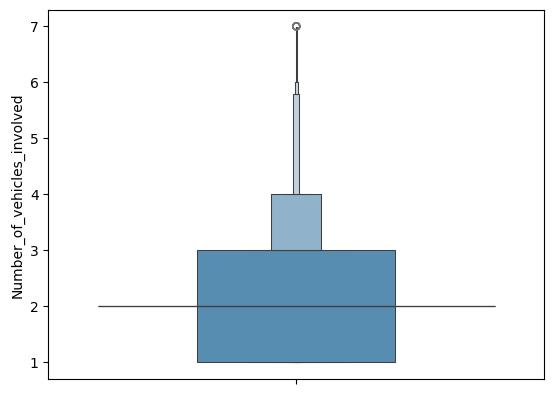

In [182]:
import seaborn as sns
sns.boxenplot(df['Number_of_vehicles_involved'])

<Axes: ylabel='Number_of_casualties'>

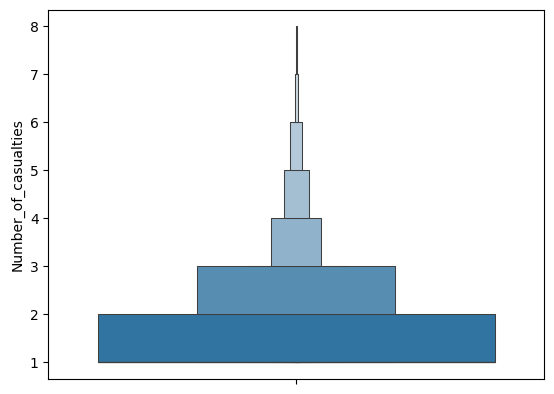

In [183]:
import seaborn as sns
sns.boxenplot(df['Number_of_casualties'])

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

In [184]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Pedestrian_movement,Cause_of_accident,Accident_severity,Lanes_or_Medians_Double carriageway (median),Lanes_or_Medians_One way,Lanes_or_Medians_Two-way (divided with broken lines road marking),Lanes_or_Medians_Two-way (divided with solid lines road marking),Lanes_or_Medians_Undivided Two way,Lanes_or_Medians_Unknown,Lanes_or_Medians_other
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,Not a Pedestrian,Moving Backward,Slight Injury,False,False,True,False,False,False,False
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,Not a Pedestrian,Overtaking,Slight Injury,False,False,False,False,True,False,False
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,Not a Pedestrian,Changing lane to the left,Serious Injury,False,False,False,False,False,False,True
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,...,Not a Pedestrian,Changing lane to the right,Slight Injury,False,False,False,False,False,False,True
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Industrial areas,...,Not a Pedestrian,Overtaking,Slight Injury,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,Outside rural areas,...,Not a Pedestrian,No distancing,Slight Injury,False,False,False,False,True,False,False
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Outside rural areas,...,Not a Pedestrian,No distancing,Slight Injury,False,False,True,False,False,False,False
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,,Owner,Outside rural areas,...,Not a Pedestrian,Changing lane to the right,Serious Injury,False,False,True,False,False,False,False
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Office areas,...,Not a Pedestrian,Driving under the influence of drugs,Slight Injury,False,False,False,False,True,False,False


In [185]:
df['Casualty_severity'] = (df['Casualty_severity'].astype(str))


In [186]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split



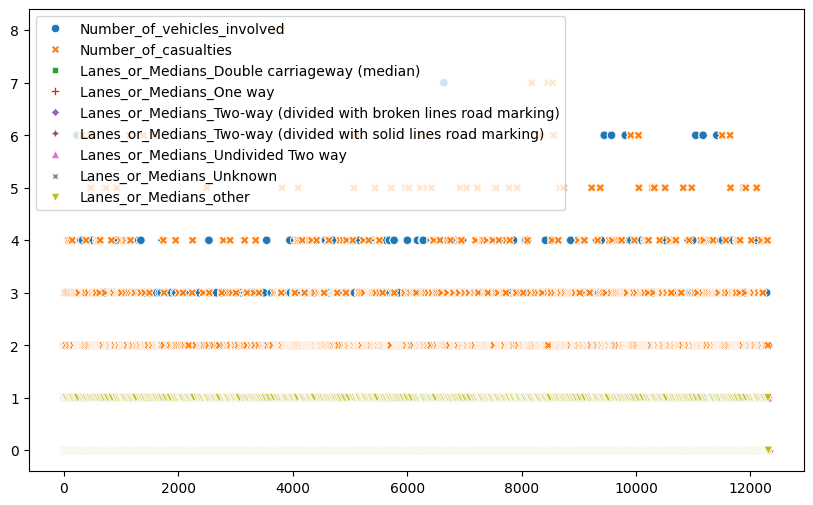

In [187]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df)
plt.show()

<Axes: xlabel='Number_of_casualties', ylabel='Owner_of_vehicle'>

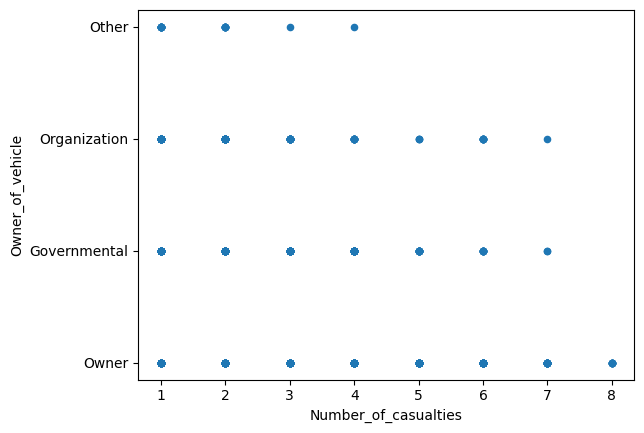

In [188]:
df.plot.scatter(x='Number_of_casualties', y='Owner_of_vehicle')

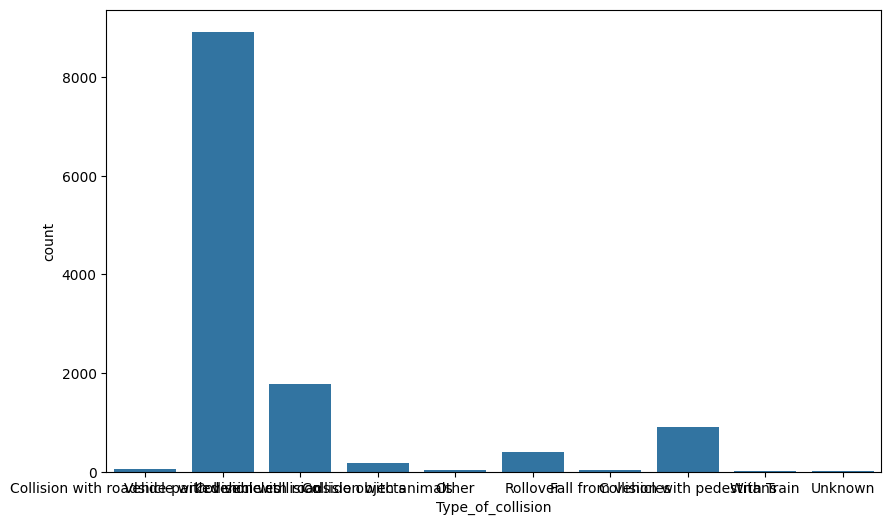

In [189]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Type_of_collision',data=df)

plt.show()

<Axes: ylabel='Number_of_casualties'>

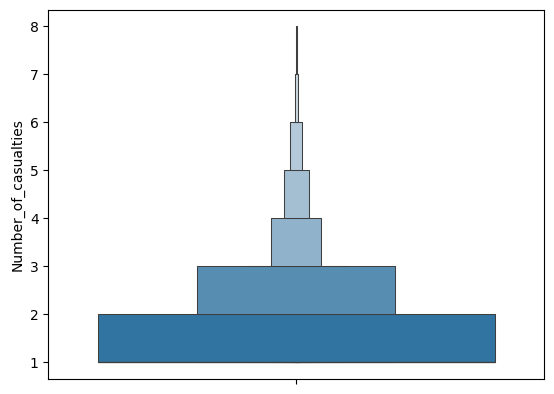

In [190]:
import seaborn as sns
sns.boxenplot(df['Number_of_casualties'])

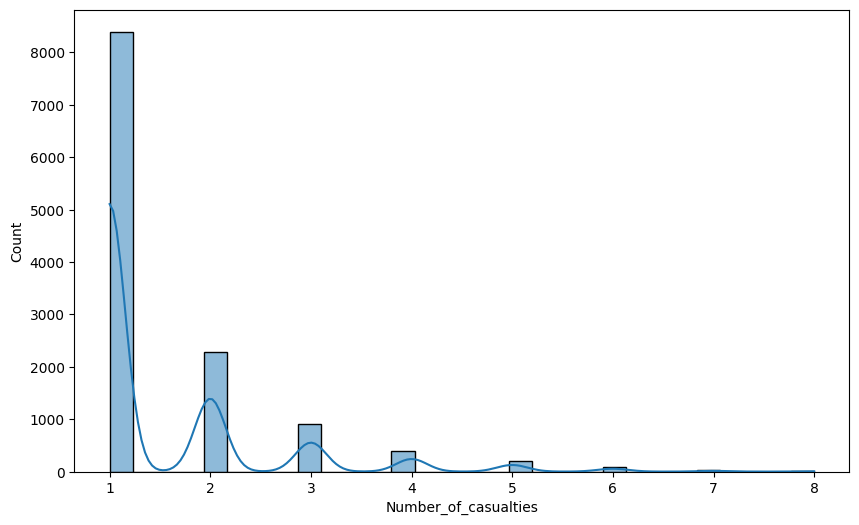

In [191]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Number_of_casualties'].dropna(), bins=30, kde=True)
plt.show()

<Figure size 500x500 with 0 Axes>

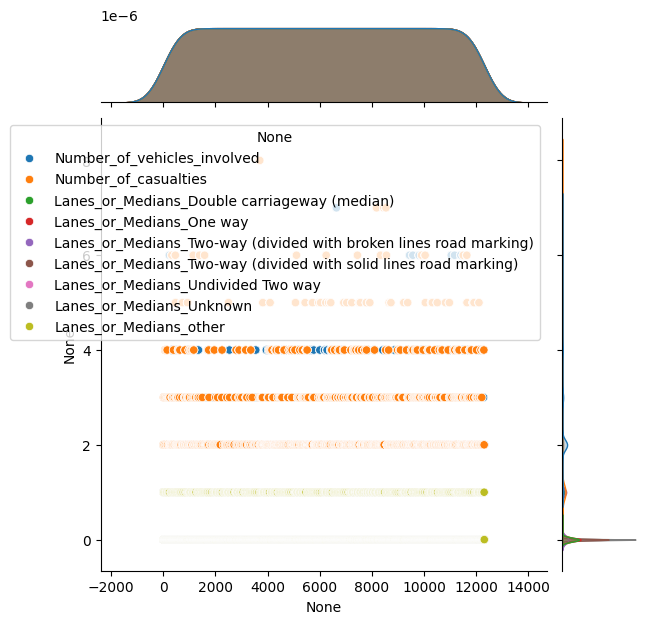

In [192]:
plt.figure(figsize=(5, 5))
sns.jointplot(df)

plt.show()

array([[<Axes: title={'center': 'Number_of_vehicles_involved'}>,
        <Axes: title={'center': 'Number_of_casualties'}>]], dtype=object)

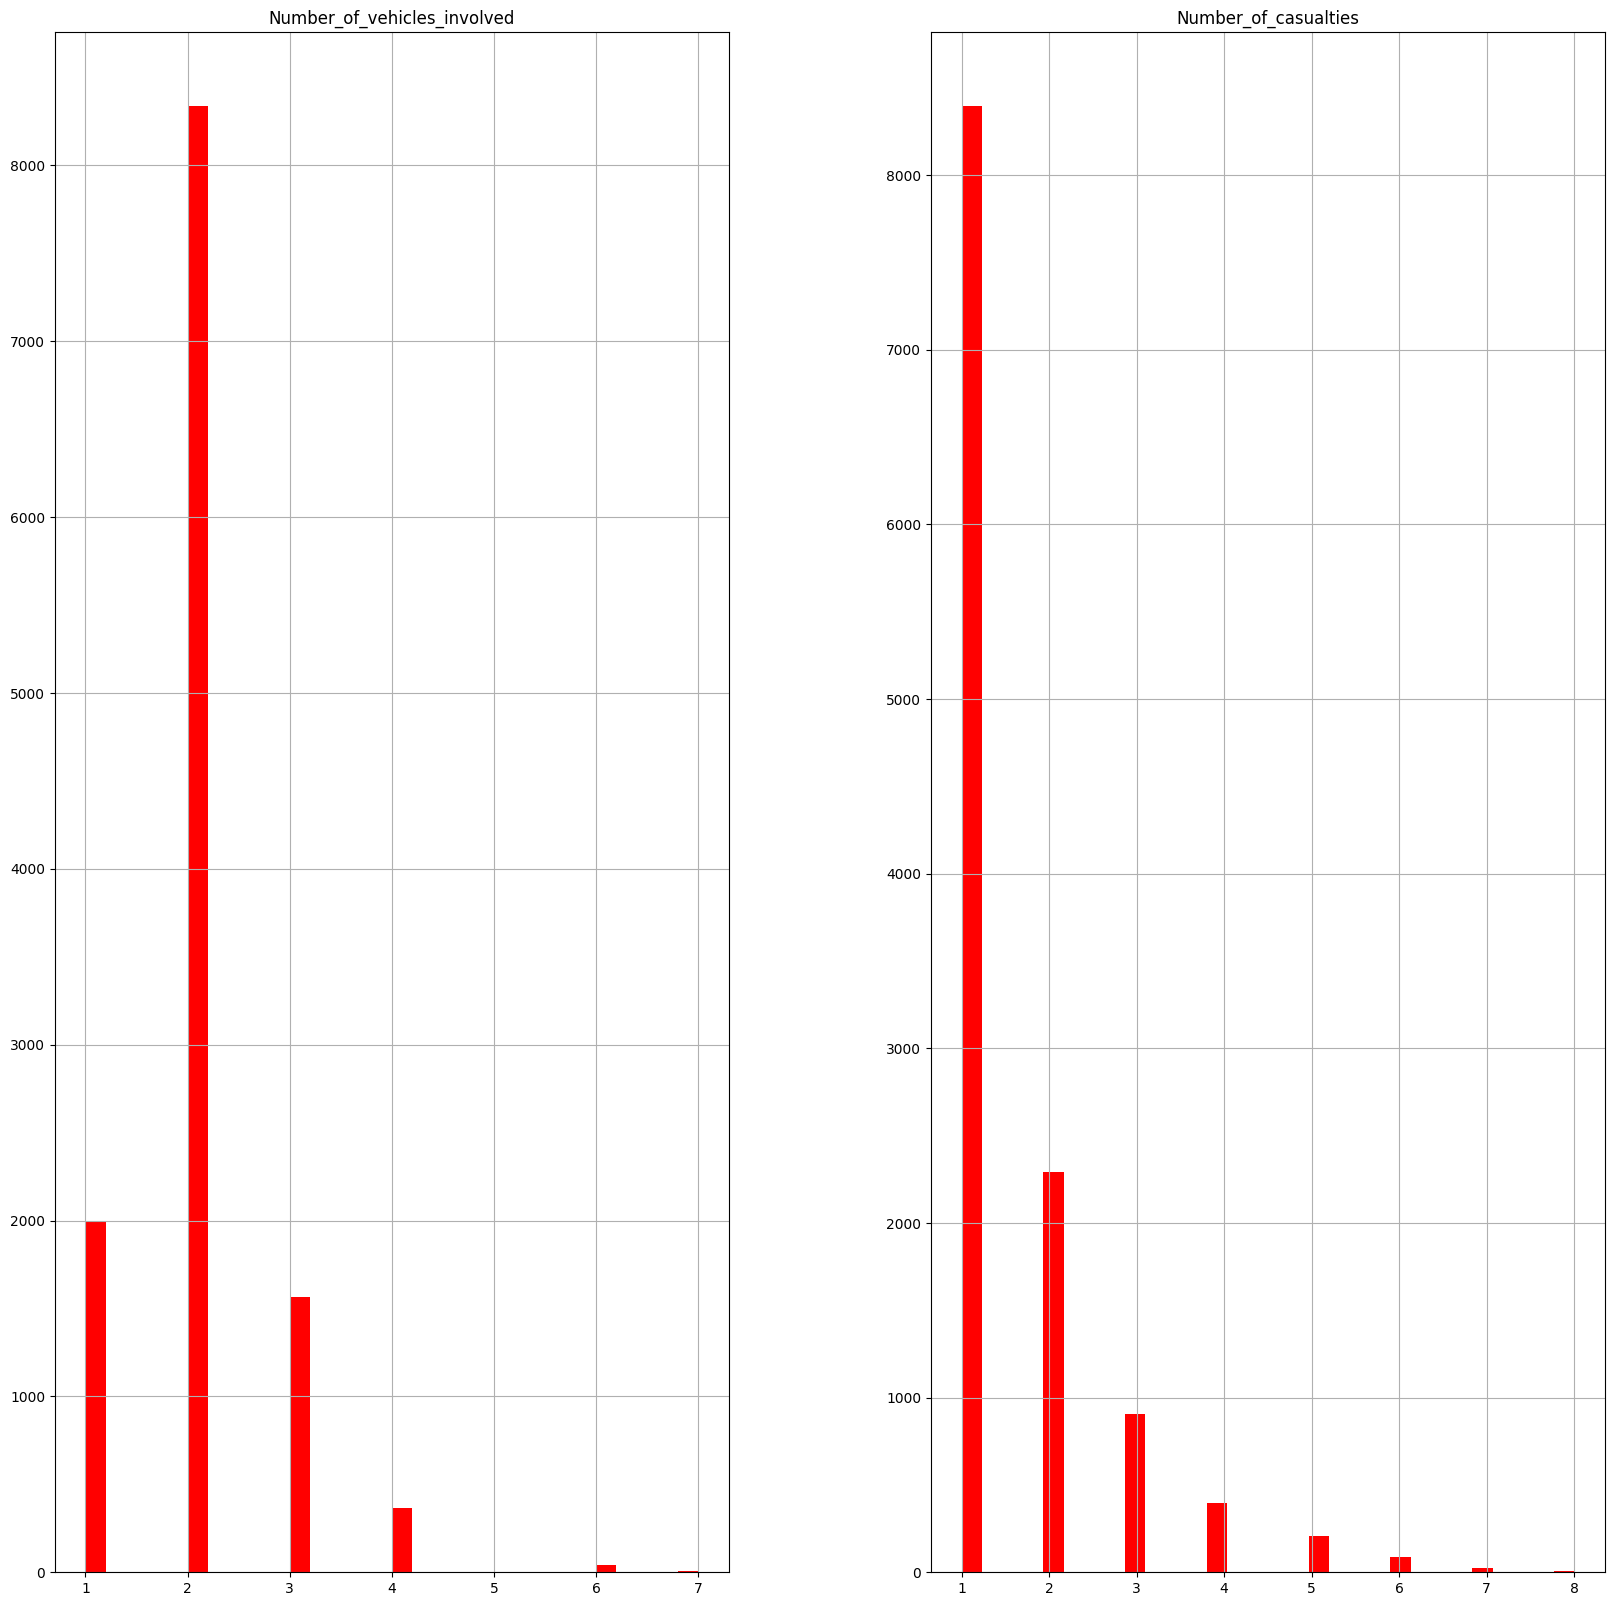

In [193]:
df.hist(bins=30, figsize=(20,20), color='r')


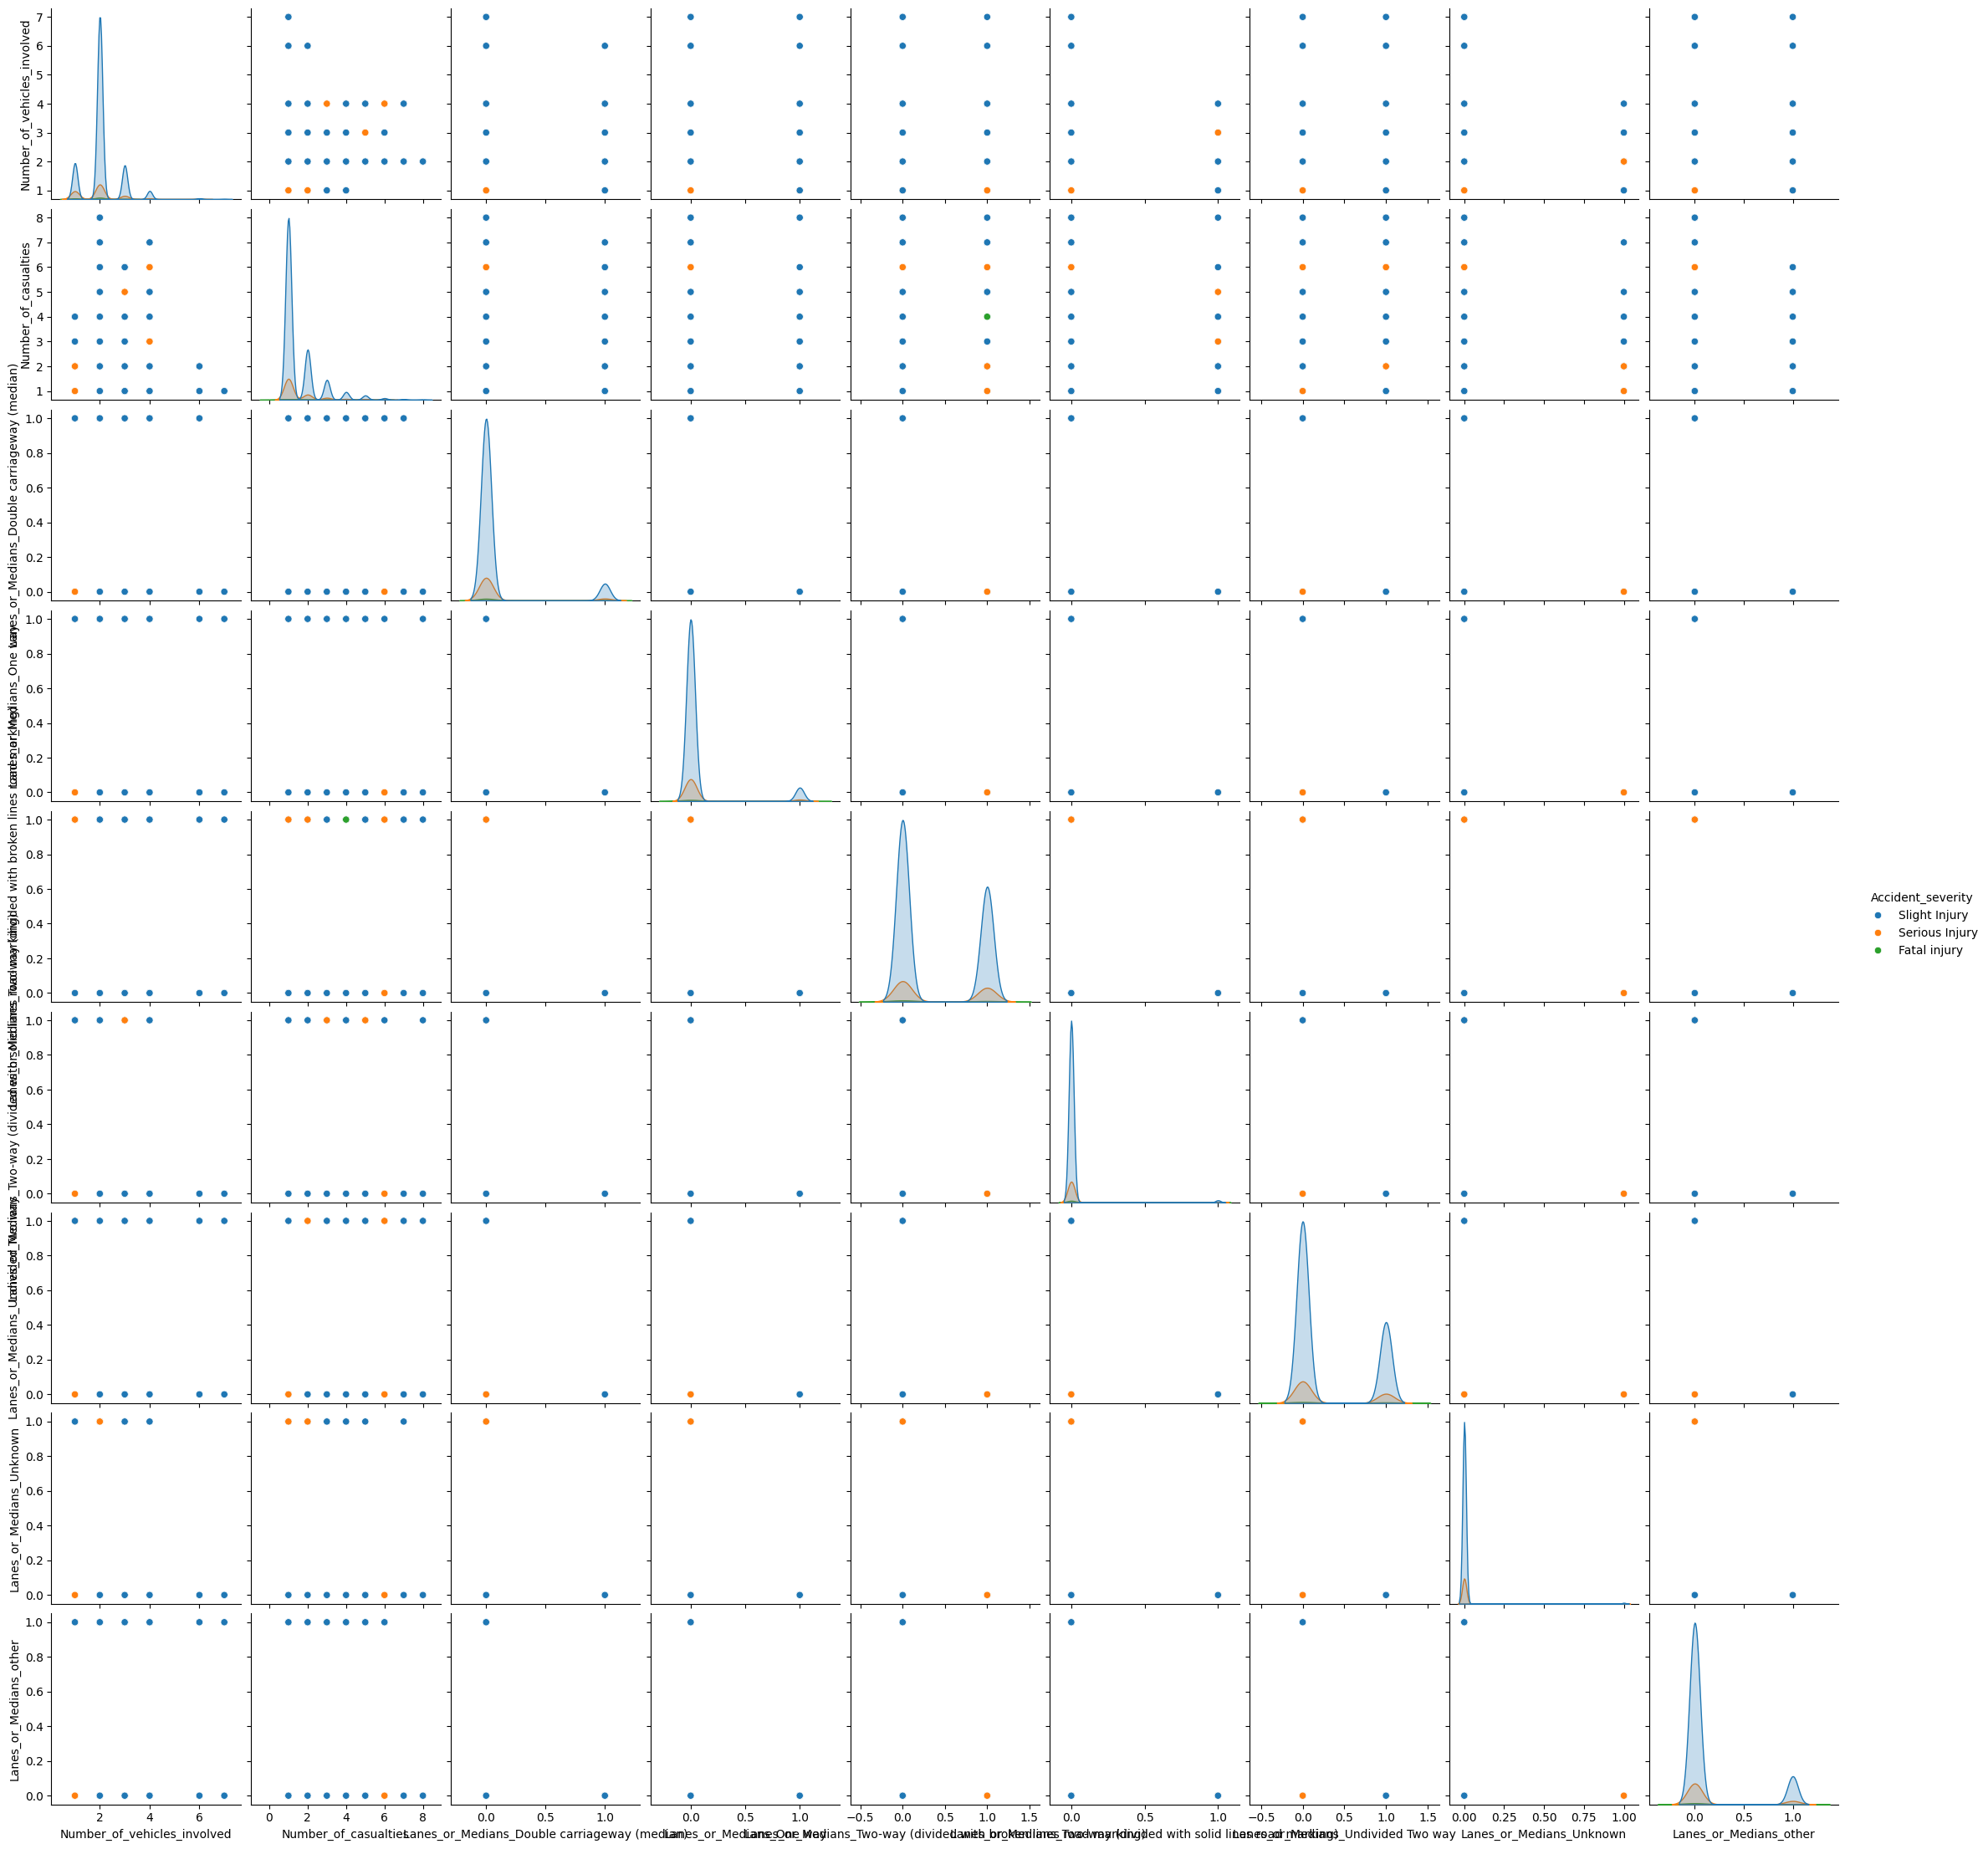

In [194]:
sns.pairplot(df, hue='Accident_severity')

In [195]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Pedestrian_movement,Cause_of_accident,Accident_severity,Lanes_or_Medians_Double carriageway (median),Lanes_or_Medians_One way,Lanes_or_Medians_Two-way (divided with broken lines road marking),Lanes_or_Medians_Two-way (divided with solid lines road marking),Lanes_or_Medians_Undivided Two way,Lanes_or_Medians_Unknown,Lanes_or_Medians_other
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,Not a Pedestrian,Moving Backward,Slight Injury,False,False,True,False,False,False,False
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,Not a Pedestrian,Overtaking,Slight Injury,False,False,False,False,True,False,False
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,Not a Pedestrian,Changing lane to the left,Serious Injury,False,False,False,False,False,False,True
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,...,Not a Pedestrian,Changing lane to the right,Slight Injury,False,False,False,False,False,False,True
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Industrial areas,...,Not a Pedestrian,Overtaking,Slight Injury,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,Outside rural areas,...,Not a Pedestrian,No distancing,Slight Injury,False,False,False,False,True,False,False
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Outside rural areas,...,Not a Pedestrian,No distancing,Slight Injury,False,False,True,False,False,False,False
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,,Owner,Outside rural areas,...,Not a Pedestrian,Changing lane to the right,Serious Injury,False,False,True,False,False,False,False
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Office areas,...,Not a Pedestrian,Driving under the influence of drugs,Slight Injury,False,False,False,False,True,False,False


In [196]:
df.dtypes

Time                                                                  object
Day_of_week                                                           object
Age_band_of_driver                                                    object
Sex_of_driver                                                         object
Educational_level                                                     object
Vehicle_driver_relation                                               object
Driving_experience                                                    object
Type_of_vehicle                                                       object
Owner_of_vehicle                                                      object
Area_accident_occured                                                 object
Road_allignment                                                       object
Types_of_Junction                                                     object
Road_surface_type                                                     object

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 33 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Time                                                               12316 non-null  object 
 1   Day_of_week                                                        12316 non-null  object 
 2   Age_band_of_driver                                                 12316 non-null  object 
 3   Sex_of_driver                                                      12316 non-null  object 
 4   Educational_level                                                  12316 non-null  object 
 5   Vehicle_driver_relation                                            12316 non-null  object 
 6   Driving_experience                                                 12316 non-null  object 
 7   Type_of_vehicle       

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [198]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Pedestrian_movement,Cause_of_accident,Accident_severity,Lanes_or_Medians_Double carriageway (median),Lanes_or_Medians_One way,Lanes_or_Medians_Two-way (divided with broken lines road marking),Lanes_or_Medians_Two-way (divided with solid lines road marking),Lanes_or_Medians_Undivided Two way,Lanes_or_Medians_Unknown,Lanes_or_Medians_other
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,Not a Pedestrian,Moving Backward,Slight Injury,False,False,True,False,False,False,False
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,Not a Pedestrian,Overtaking,Slight Injury,False,False,False,False,True,False,False
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,Not a Pedestrian,Changing lane to the left,Serious Injury,False,False,False,False,False,False,True
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,...,Not a Pedestrian,Changing lane to the right,Slight Injury,False,False,False,False,False,False,True
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Industrial areas,...,Not a Pedestrian,Overtaking,Slight Injury,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,Outside rural areas,...,Not a Pedestrian,No distancing,Slight Injury,False,False,False,False,True,False,False
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Outside rural areas,...,Not a Pedestrian,No distancing,Slight Injury,False,False,True,False,False,False,False
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,,Owner,Outside rural areas,...,Not a Pedestrian,Changing lane to the right,Serious Injury,False,False,True,False,False,False,False
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Office areas,...,Not a Pedestrian,Driving under the influence of drugs,Slight Injury,False,False,False,False,True,False,False


In [199]:
X = df.drop(['Accident_severity'], axis=1)
y = df['Accident_severity']

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 33 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Time                                                               12316 non-null  object 
 1   Day_of_week                                                        12316 non-null  object 
 2   Age_band_of_driver                                                 12316 non-null  object 
 3   Sex_of_driver                                                      12316 non-null  object 
 4   Educational_level                                                  12316 non-null  object 
 5   Vehicle_driver_relation                                            12316 non-null  object 
 6   Driving_experience                                                 12316 non-null  object 
 7   Type_of_vehicle       

In [201]:
numerical_cols = ['Number_of_vehicles_involved','Number_of_casualties']
categorical_cols = ['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience','Type_of_vehicle','Owner_of_vehicle','Area_accident_occured']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(sparse_output=False), categorical_cols)
    ])

X = df.drop('Accident_severity', axis=1)
y = df['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [202]:


pipeline = Pipeline(steps=[('preprocessor', preprocessor), # type: ignore
                           ('classifier', LogisticRegression(max_iter=1000))])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Number_of_vehicles_involved',
                                                   'Number_of_casualties']),
                                                 ('cat',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['Day_of_week',
                                                   'Age_band_of_driver',
                                                   'Sex_of_driver',
                                                   'Educational_level',
                                                   'Vehicle_driver_relation',
                                                   'Driving_experience',
                                                   'Type_of_vehicle',
                                                   'Owner_of_vehicle',
                                                   'Area_accident_occured'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [203]:
# Defining numerical and categorical columns
numerical_cols = ['Number_of_vehicles_involved','Number_of_casualties']
categorical_cols = ['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience','Type_of_vehicle','Owner_of_vehicle','Area_accident_occured']
# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Fit and transform the data
X_processed = preprocessor.fit_transform(X)

In [204]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print(X_train)
print(X_test)

  (0, 0)	1.3928202366148152
  (0, 1)	2.434474261401353
  (0, 6)	1.0
  (0, 13)	1.0
  (0, 15)	1.0
  (0, 18)	1.0
  (0, 24)	1.0
  (0, 32)	1.0
  (0, 44)	1.0
  (0, 54)	1.0
  (0, 61)	1.0
  (1, 0)	1.3928202366148152
  (1, 1)	-0.5442638586190858
  (1, 6)	1.0
  (1, 9)	1.0
  (1, 15)	1.0
  (1, 21)	1.0
  (1, 26)	1.0
  (1, 30)	1.0
  (1, 36)	1.0
  (1, 54)	1.0
  (1, 68)	1.0
  (2, 0)	1.3928202366148152
  (2, 1)	1.4415615547278733
  (2, 2)	1.0
  :	:
  (9849, 36)	1.0
  (9849, 51)	1.0
  (9849, 57)	1.0
  (9850, 0)	-0.059060765005841856
  (9850, 1)	0.44864884805439376
  (9850, 6)	1.0
  (9850, 11)	1.0
  (9850, 15)	1.0
  (9850, 19)	1.0
  (9850, 26)	1.0
  (9850, 30)	1.0
  (9850, 36)	1.0
  (9850, 54)	1.0
  (9850, 67)	1.0
  (9851, 0)	-0.059060765005841856
  (9851, 1)	-0.5442638586190858
  (9851, 2)	1.0
  (9851, 10)	1.0
  (9851, 15)	1.0
  (9851, 21)	1.0
  (9851, 24)	1.0
  (9851, 30)	1.0
  (9851, 44)	1.0
  (9851, 51)	1.0
  (9851, 64)	1.0
  (0, 0)	-0.059060765005841856
  (0, 1)	0.44864884805439376
  (0, 2)	1.0
  (0

In [205]:
from sklearn.model_selection import cross_val_score

log_reg = LogisticRegression(max_iter=1000)
cv_scores = cross_val_score(log_reg, X_processed, y, cv=5)
cv_scores.mean()

log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))


Accuracy:  0.8372564935064936
Classification Report: 
                 precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00        37
Serious Injury       0.00      0.00      0.00       363
 Slight Injury       0.84      1.00      0.91      2064

      accuracy                           0.84      2464
     macro avg       0.28      0.33      0.30      2464
  weighted avg       0.70      0.84      0.76      2464



C:\Users\abdau\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abdau\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abdau\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

#### Decision Tree Classifier

In [206]:
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import cross_val_score,ShuffleSplit
from sklearn.linear_model import LogisticRegression, Ridge,LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier



In [207]:


iris = load_iris()

X = iris.data[:, 2:]  

y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)

tree_clf.fit(X, y)


DecisionTreeClassifier(max_depth=2, random_state=42)

#### Support Vector Machine (SVM)

In [208]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]


In [209]:
svm_clf = SVC(kernel="linear", C=1.0)
svm_clf.fit(X, y)

SVC(kernel='linear')

#### K-Neighbors Classifier

In [210]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)

print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [211]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)

knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

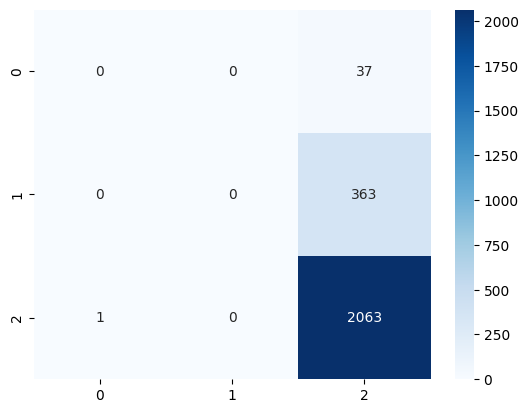

In [212]:
 #Confusion Matrix

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.show()


## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: